In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
df=pd.read_csv("J:/UPGRAD/Machine Learning I/Assignment/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
df.shape

(205, 26)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
df=df.drop('car_ID',axis=1)

In [10]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
list(df.CarName.unique())

['alfa-romero giulia',
 'alfa-romero stelvio',
 'alfa-romero Quadrifoglio',
 'audi 100 ls',
 'audi 100ls',
 'audi fox',
 'audi 5000',
 'audi 4000',
 'audi 5000s (diesel)',
 'bmw 320i',
 'bmw x1',
 'bmw x3',
 'bmw z4',
 'bmw x4',
 'bmw x5',
 'chevrolet impala',
 'chevrolet monte carlo',
 'chevrolet vega 2300',
 'dodge rampage',
 'dodge challenger se',
 'dodge d200',
 'dodge monaco (sw)',
 'dodge colt hardtop',
 'dodge colt (sw)',
 'dodge coronet custom',
 'dodge dart custom',
 'dodge coronet custom (sw)',
 'honda civic',
 'honda civic cvcc',
 'honda accord cvcc',
 'honda accord lx',
 'honda civic 1500 gl',
 'honda accord',
 'honda civic 1300',
 'honda prelude',
 'honda civic (auto)',
 'isuzu MU-X',
 'isuzu D-Max ',
 'isuzu D-Max V-Cross',
 'jaguar xj',
 'jaguar xf',
 'jaguar xk',
 'maxda rx3',
 'maxda glc deluxe',
 'mazda rx2 coupe',
 'mazda rx-4',
 'mazda glc deluxe',
 'mazda 626',
 'mazda glc',
 'mazda rx-7 gs',
 'mazda glc 4',
 'mazda glc custom l',
 'mazda glc custom',
 'buick elect

In [13]:
list(df['fueltype'].unique())

['gas', 'diesel']

In [14]:
list(df['aspiration'].unique())

['std', 'turbo']

In [15]:
list(df['doornumber'].unique())

['two', 'four']

In [16]:
list(df['carbody'].unique())

['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']

In [17]:
list(df['drivewheel'].unique())

['rwd', 'fwd', '4wd']

In [18]:
list(df['enginelocation'].unique())

['front', 'rear']

In [19]:
list(df['enginetype'].unique())

['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv']

In [20]:
list(df['cylindernumber'].unique())

['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']

In [21]:
list(df['fuelsystem'].unique())

['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']

<Figure size 1152x720 with 0 Axes>

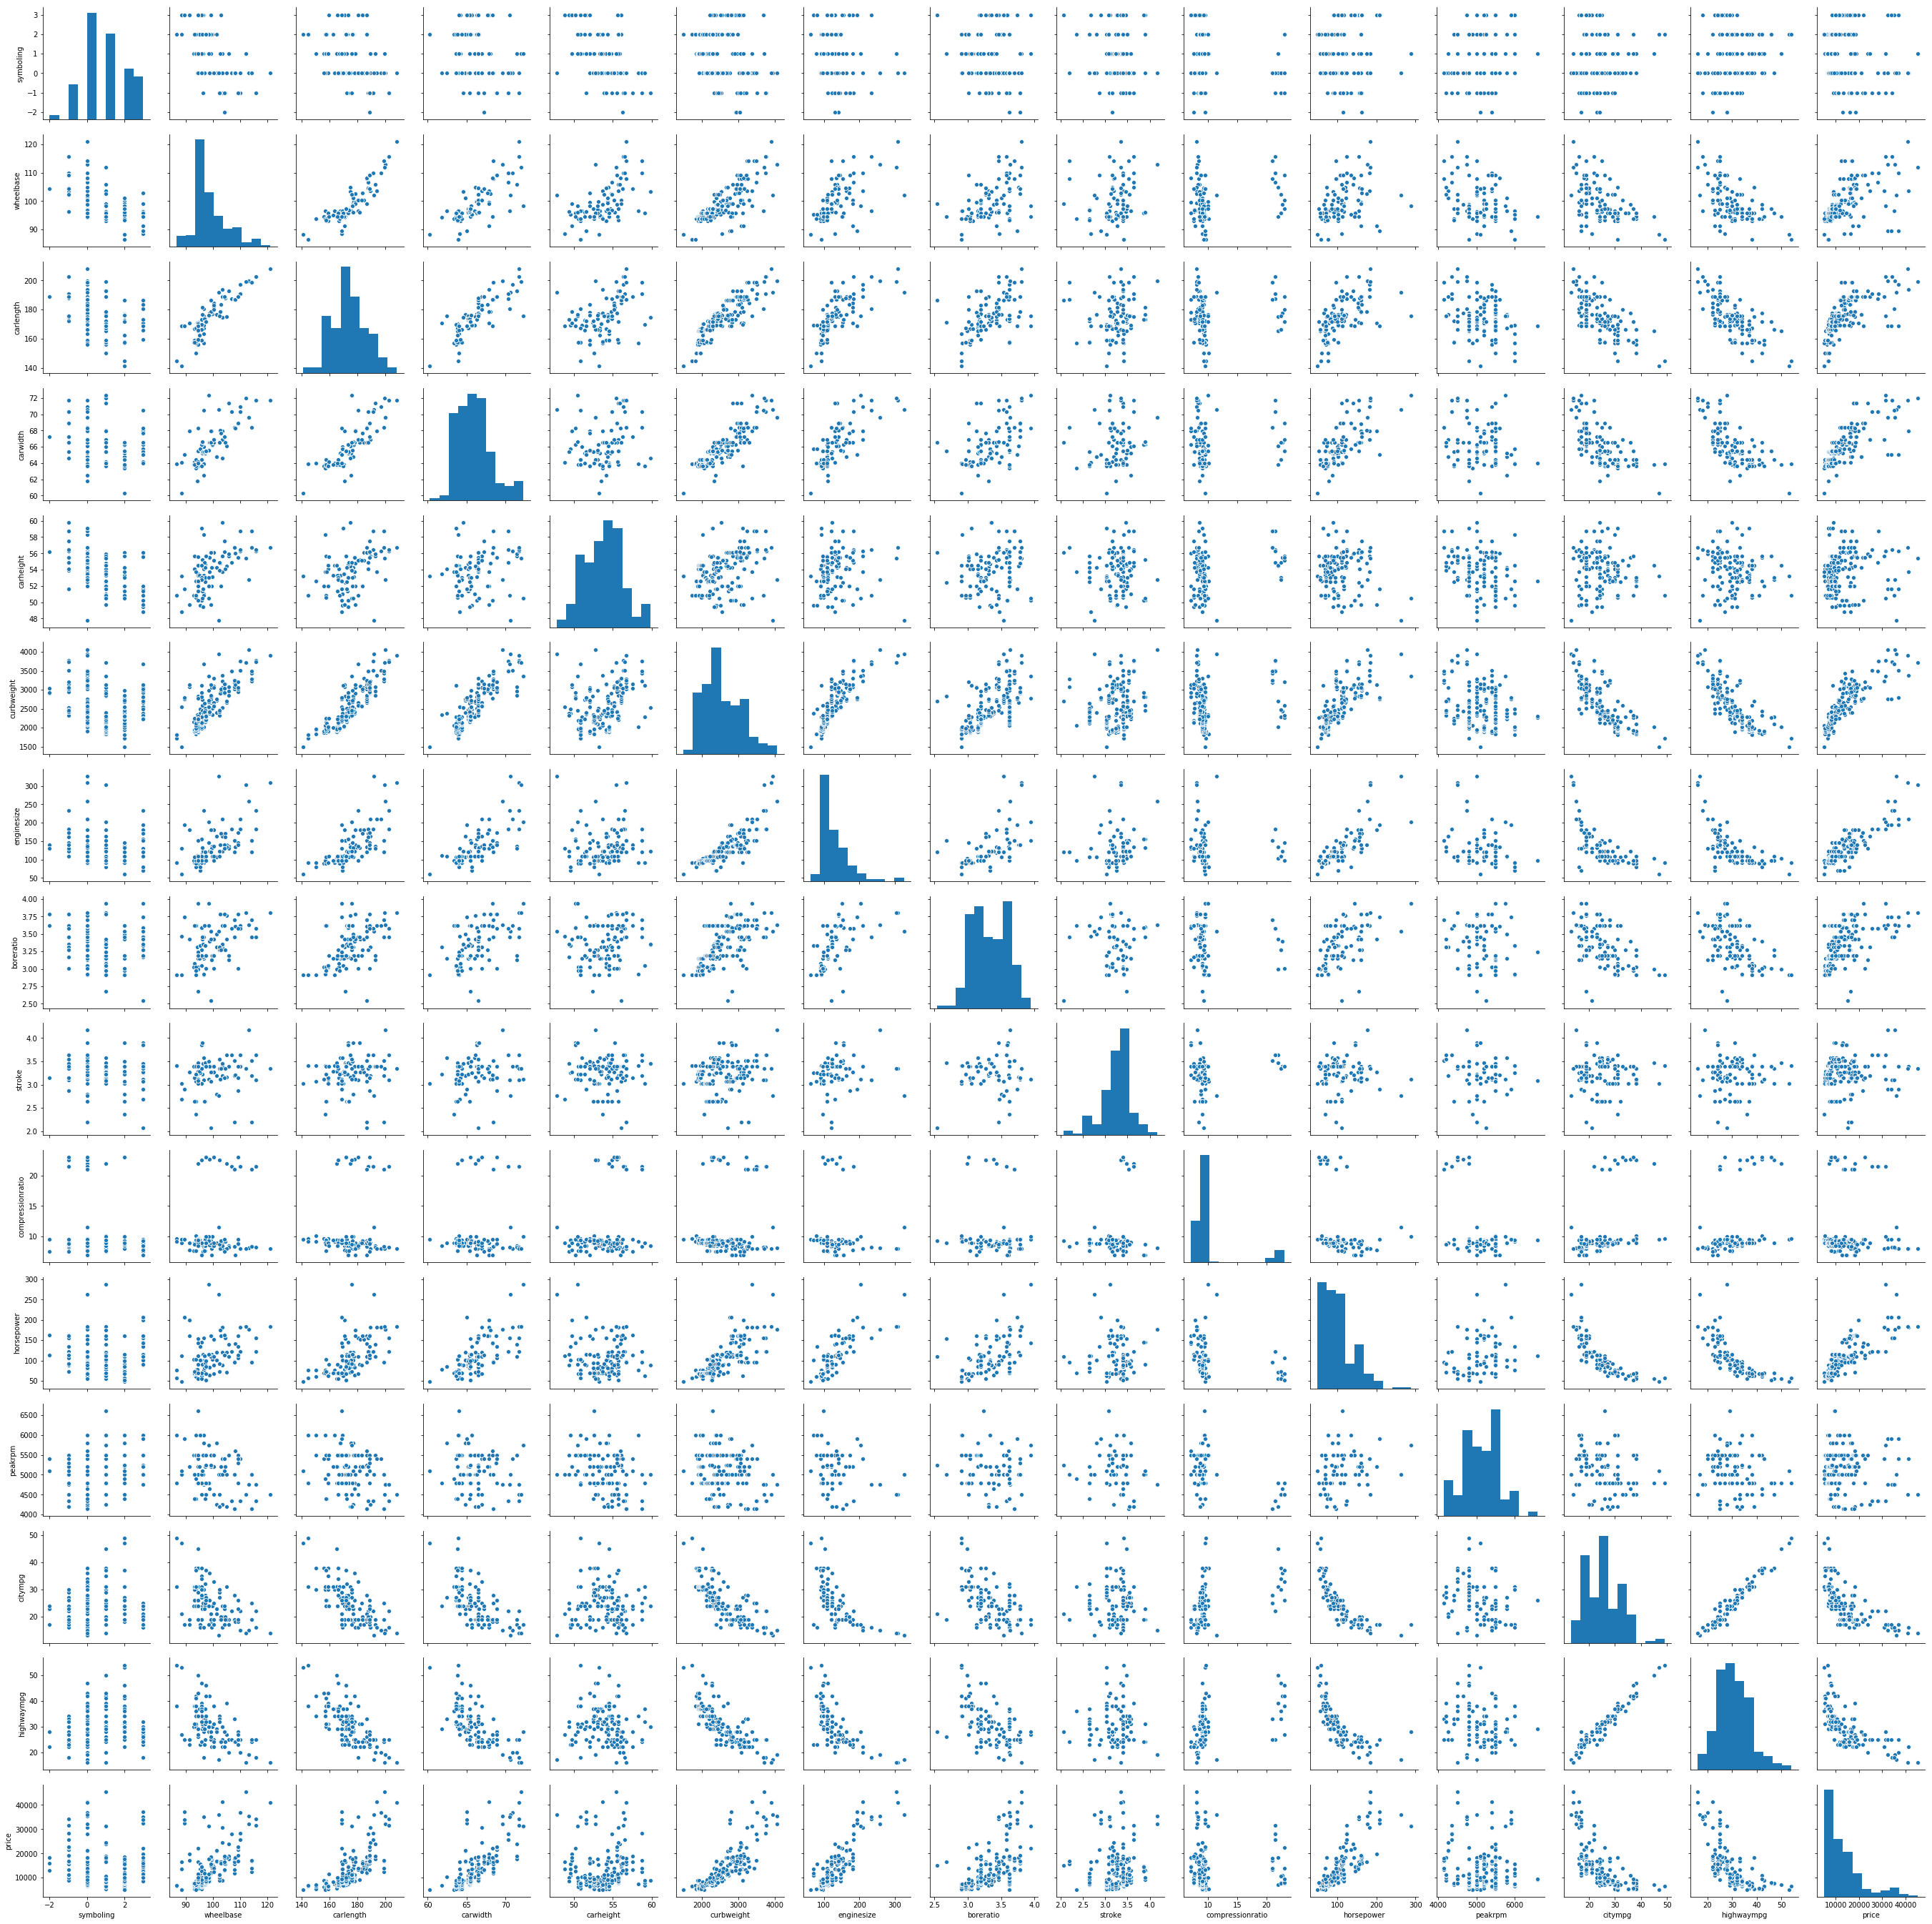

In [22]:
plt.figure(figsize=(16,10))
sns.pairplot(df)

In [23]:
Car_company = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"Car_company",Car_company)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,symboling,fueltype,Car_company,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,audi,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,audi,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [24]:
df.Car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [25]:
def replace_name(a,b):
    df.Car_company.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')
replace_name('Nissan','nissan')

In [26]:
df.Car_company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [27]:
df.columns

Index(['symboling', 'fueltype', 'Car_company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [28]:
df.shape

(205, 25)

<Figure size 1152x720 with 0 Axes>

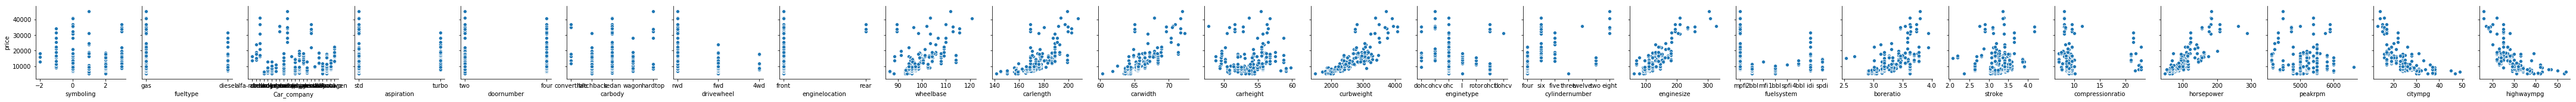

In [29]:
plt.figure(figsize=(16,10))
sns.pairplot(x_vars=['symboling', 'fueltype', 'Car_company', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg'],y_vars='price',data=df)
plt.show()

Text(0.5, 1.0, 'highwaympg vs price')

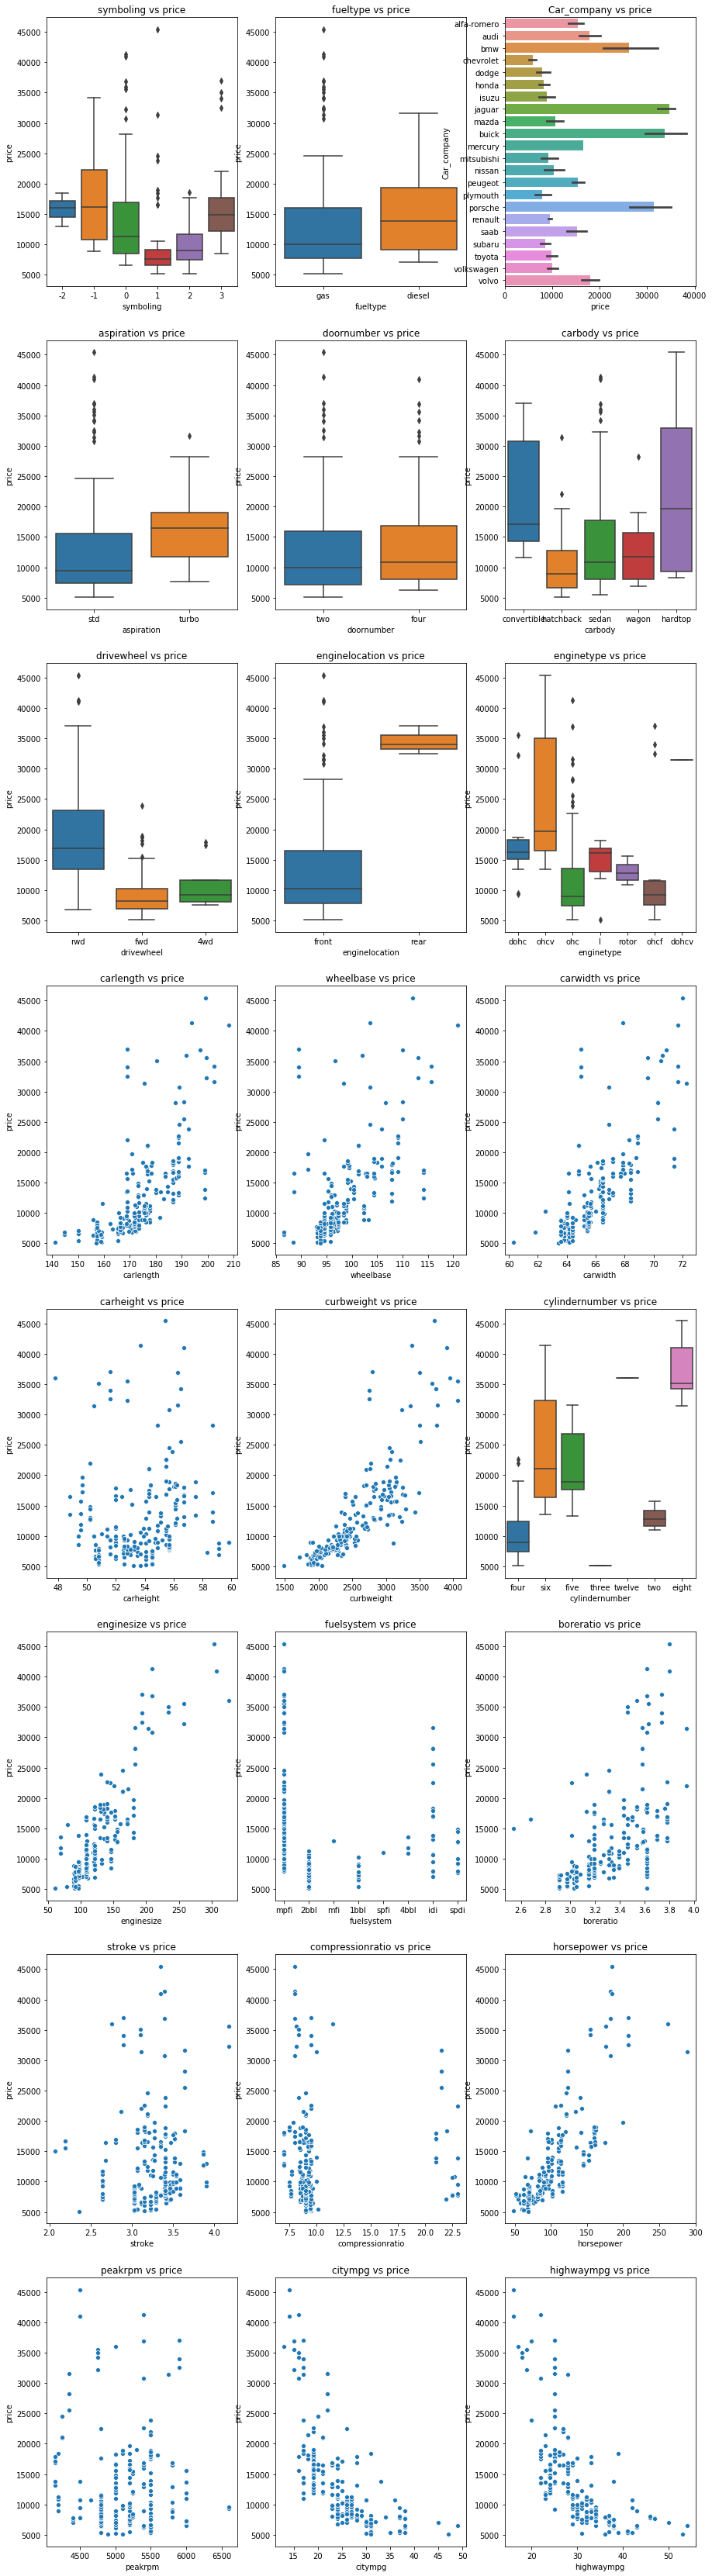

In [30]:
plt.figure(figsize=(15,60))
plt.subplot(8,3,1)
sns.boxplot(x='symboling',y='price',data=df)
plt.title("symboling vs price")

plt.subplot(8,3,2)
sns.boxplot(x='fueltype',y='price',data=df)
plt.title("fueltype vs price")

plt.subplot(8,3,3)
sns.barplot(x='price',y='Car_company',data=df)
plt.title("Car_company vs price")

plt.subplot(8,3,4)
sns.boxplot(x='aspiration',y='price',data=df)
plt.title("aspiration vs price")

plt.subplot(8,3,5)
sns.boxplot(x='doornumber',y='price',data=df)
plt.title("doornumber vs price")

plt.subplot(8,3,6)
sns.boxplot(x='carbody',y='price',data=df)
plt.title("carbody vs price")

plt.subplot(8,3,7)
sns.boxplot(x='drivewheel',y='price',data=df)
plt.title("drivewheel vs price")

plt.subplot(8,3,8)
sns.boxplot(x='enginelocation',y='price',data=df)
plt.title("enginelocation vs price")

plt.subplot(8,3,9)
sns.boxplot(x='enginetype',y='price',data=df)
plt.title("enginetype vs price")


plt.subplot(8,3,10)
sns.scatterplot(x='carlength',y='price',data=df)
plt.title("carlength vs price")

plt.subplot(8,3,11)
sns.scatterplot(x='wheelbase',y='price',data=df)
plt.title("wheelbase vs price")

        
plt.subplot(8,3,12)
sns.scatterplot(x='carwidth',y='price',data=df)
plt.title("carwidth vs price")

plt.subplot(8,3,13)
sns.scatterplot(x='carheight',y='price',data=df)
plt.title("carheight vs price")


plt.subplot(8,3,14)
sns.scatterplot(x='curbweight',y='price',data=df)
plt.title("curbweight vs price")

plt.subplot(8,3,15)
sns.boxplot(x='cylindernumber',y='price',data=df)
plt.title("cylindernumber vs price")


plt.subplot(8,3,16)
sns.scatterplot(x='enginesize',y='price',data=df)
plt.title("enginesize vs price")

plt.subplot(8,3,17)
sns.scatterplot(x='fuelsystem',y='price',data=df)
plt.title("fuelsystem vs price")

plt.subplot(8,3,18)
sns.scatterplot(x='boreratio',y='price',data=df)
plt.title("boreratio vs price")


plt.subplot(8,3,19)
sns.scatterplot(x='stroke',y='price',data=df)
plt.title("stroke vs price")

plt.subplot(8,3,20)
sns.scatterplot(x='compressionratio',y='price',data=df)
plt.title("compressionratio vs price")


plt.subplot(8,3,21)
sns.scatterplot(x='horsepower',y='price',data=df)
plt.title("horsepower vs price")

plt.subplot(8,3,22)
sns.scatterplot(x='peakrpm',y='price',data=df)
plt.title("peakrpm vs price")

plt.subplot(8,3,23)
sns.scatterplot(x='citympg',y='price',data=df)
plt.title("citympg vs price")

plt.subplot(8,3,24)
sns.scatterplot(x='highwaympg',y='price',data=df)
plt.title("highwaympg vs price")


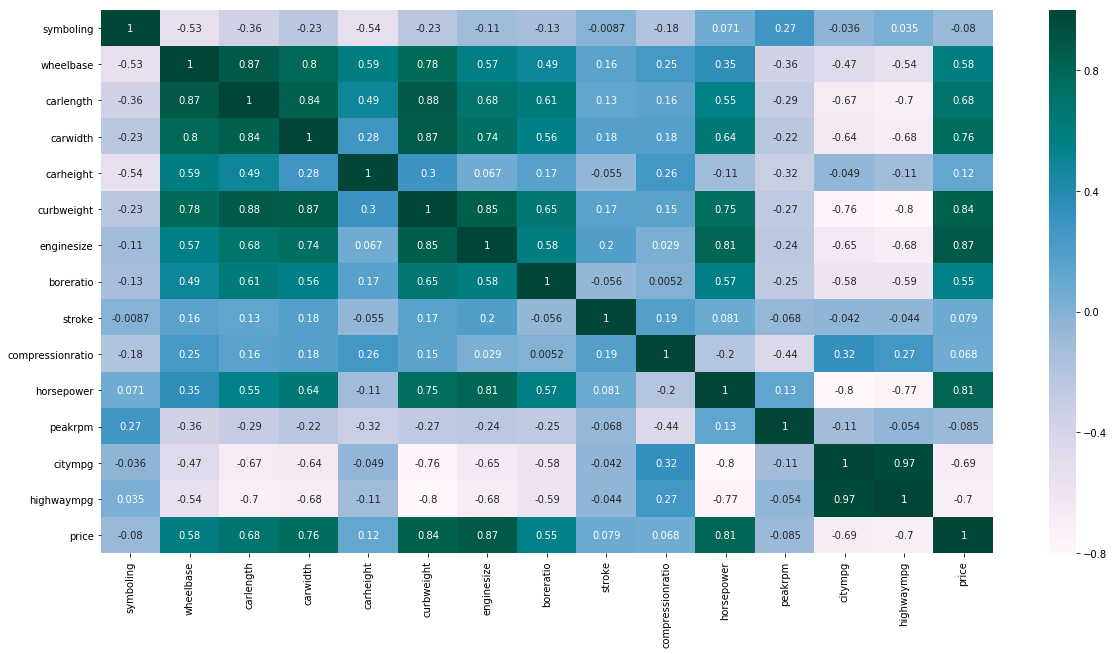

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap='PuBuGn',annot=True)

### after analysing found important attributes which is contributing towards price
 - 'price',fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber''enginesize', 'boreratio','horsepower', 'carlength','carwidth'

In [32]:
df_lr = df[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase','curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'carlength','carwidth']]
df_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,carlength,carwidth
0,13495.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
1,16500.0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,168.8,64.1
2,16500.0,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,171.2,65.5
3,13950.0,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,176.6,66.2
4,17450.0,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,176.6,66.4


In [33]:
df_lr.shape

(205, 14)

In [34]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
price             205 non-null float64
fueltype          205 non-null object
aspiration        205 non-null object
carbody           205 non-null object
drivewheel        205 non-null object
wheelbase         205 non-null float64
curbweight        205 non-null int64
enginetype        205 non-null object
cylindernumber    205 non-null object
enginesize        205 non-null int64
boreratio         205 non-null float64
horsepower        205 non-null int64
carlength         205 non-null float64
carwidth          205 non-null float64
dtypes: float64(5), int64(3), object(6)
memory usage: 22.5+ KB


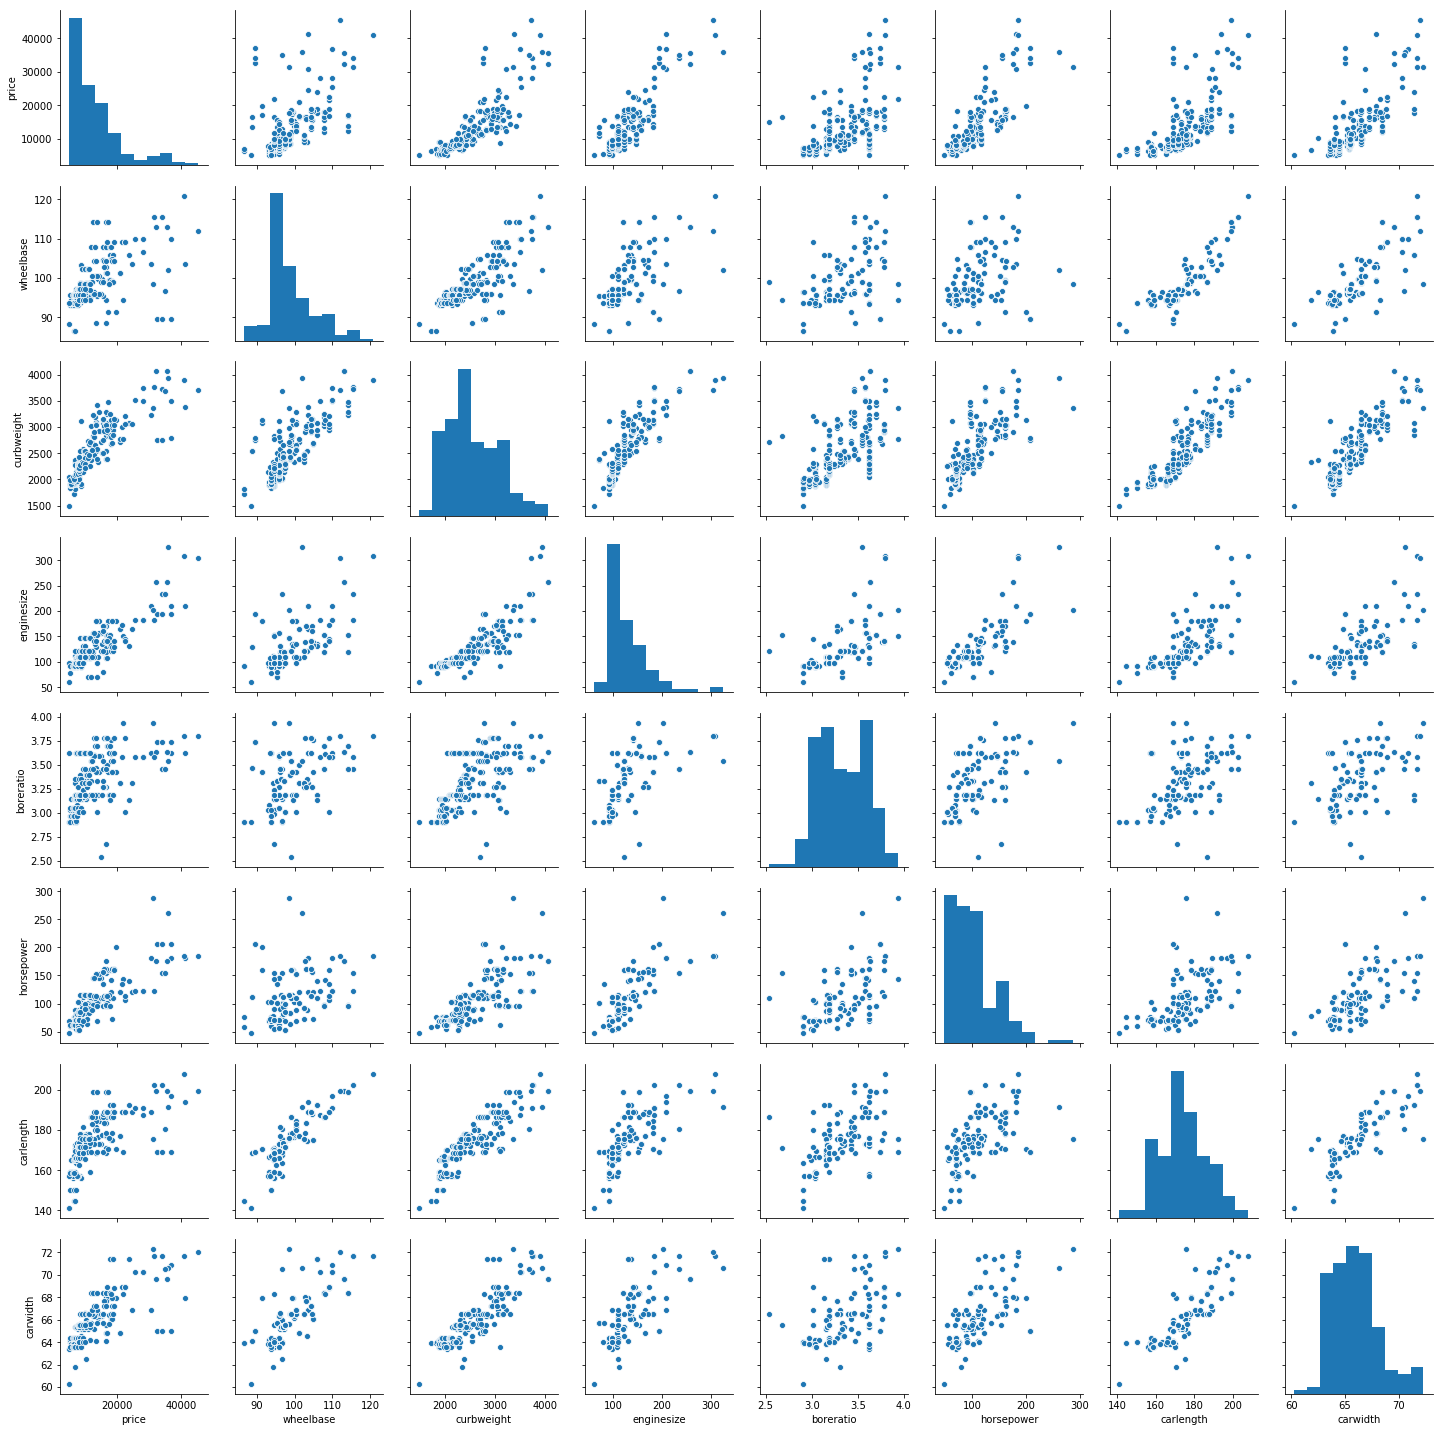

In [35]:
sns.pairplot(df_lr)

In [36]:
def dummies(x,car_price):
    to_concat = pd.get_dummies(car_price[x], drop_first = True)
    df = pd.concat([car_price, to_concat], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to the df_lr

df_lr = dummies('fueltype',df_lr)
df_lr = dummies('aspiration',df_lr)
df_lr = dummies('carbody',df_lr)
df_lr = dummies('drivewheel',df_lr)
df_lr = dummies('enginetype',df_lr)
df_lr = dummies('cylindernumber',df_lr)

In [37]:
df_lr.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,13495.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,2548,130,3.47,111,168.8,64.1,1,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,2823,152,2.68,154,171.2,65.5,1,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,2337,109,3.19,102,176.6,66.2,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,2824,136,3.19,115,176.6,66.4,1,0,...,1,0,0,0,1,0,0,0,0,0


In [38]:
df_lr.shape

(205, 28)

In [39]:
df_train, df_test = train_test_split(df_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [40]:
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [41]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,...,1,0,0,0,0,1,0,0,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,...,1,0,0,0,0,1,0,0,0,0
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,...,0,0,0,0,0,1,0,0,0,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,...,1,0,0,0,0,1,0,0,0,0


In [42]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219310,0.411141,0.407878,0.241351,0.497946,0.227302,0.525476,0.461655,0.909091,0.181818,...,0.685315,0.083916,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.204848,0.184517,0.288490,0.387050,...,0.466023,0.278236,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.399187,0.304167,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.502439,0.425000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.669919,0.550000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
y_train = df_train.pop('price')
X_train = df_train

In [44]:
y_train.head()

122    0.068818
125    0.466890
166    0.122110
1      0.314446
199    0.382131
Name: price, dtype: float64

In [45]:
X_train.head()

,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,gas,turbo,hardtop,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.426016,0.291667,1,0,0,...,1,0,0,0,0,1,0,0,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.452033,0.666667,1,0,0,...,1,0,0,0,0,1,0,0,0,0
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.448780,0.308333,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.450407,0.316667,1,0,0,...,0,0,0,0,0,1,0,0,0,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.775610,0.575000,1,1,0,...,1,0,0,0,0,1,0,0,0,0


In [46]:
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm, 10)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 4),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 14),
 ('horsepower', True, 1),
 ('carlength', False, 2),
 ('carwidth', True, 1),
 ('gas', False, 13),
 ('turbo', False, 16),
 ('hardtop', False, 9),
 ('hatchback', False, 3),
 ('sedan', False, 6),
 ('wagon', False, 5),
 ('fwd', False, 18),
 ('rwd', False, 11),
 ('dohcv', True, 1),
 ('l', False, 15),
 ('ohc', False, 7),
 ('ohcf', False, 8),
 ('ohcv', True, 1),
 ('rotor', False, 12),
 ('five', True, 1),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 17),
 ('twelve', True, 1),
 ('two', False, 10)]

In [48]:
X_train.columns[rfe.support_]

Index(['curbweight', 'enginesize', 'horsepower', 'carwidth', 'dohcv', 'ohcv',
       'five', 'four', 'six', 'twelve'],
      dtype='object')

In [49]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_rfe.head()

,curbweight,enginesize,horsepower,carwidth,dohcv,ohcv,five,four,six,twelve
122,0.272692,0.139623,0.083333,0.291667,0,0,0,1,0,0
125,0.500388,0.339623,0.395833,0.666667,0,0,0,1,0,0
166,0.314973,0.139623,0.266667,0.308333,0,0,0,1,0,0
1,0.411171,0.260377,0.262500,0.316667,0,0,0,1,0,0
199,0.647401,0.260377,0.475000,0.575000,0,0,0,1,0,0


In [50]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X
    
def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [51]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     89.56
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           8.01e-54
Time:                        00:45:44   Log-Likelihood:                 163.68
No. Observations:                 143   AIC:                            -305.4
Df Residuals:                     132   BIC:                            -272.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0293      0.040      0.725      0.4

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [52]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.44
1,curbweight,8.64
2,enginesize,8.19
4,carwidth,5.66
8,four,5.01
3,horsepower,5.00
9,six,4.54
7,five,2.54
10,twelve,1.94
5,dohcv,1.76


In [53]:
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

In [54]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     98.98
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           1.63e-54
Time:                        00:45:44   Log-Likelihood:                 162.88
No. Observations:                 143   AIC:                            -305.8
Df Residuals:                     133   BIC:                            -276.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0278      0.041      0.686      0.4

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [55]:
checkVIF(X_train_new)

,Features,VIF
0,const,36.41
1,enginesize,6.32
7,four,4.97
2,horsepower,4.78
8,six,4.51
3,carwidth,3.57
6,five,2.51
9,twelve,1.83
5,ohcv,1.62
4,dohcv,1.58


In [56]:
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

In [57]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     72.75
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           5.11e-45
Time:                        00:45:45   Log-Likelihood:                 136.77
No. Observations:                 143   AIC:                            -255.5
Df Residuals:                     134   BIC:                            -228.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0381      0.047     -0.803      0.4

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [58]:
checkVIF(X_train_new)

,Features,VIF
0,const,34.76
6,four,4.75
1,horsepower,4.12
7,six,3.65
5,five,2.47
2,carwidth,2.33
3,dohcv,1.57
4,ohcv,1.57
8,twelve,1.49


### RESIDUAL ANALYSIS



In [59]:
lm = sm.OLS(y_train,X_train_new).fit()
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

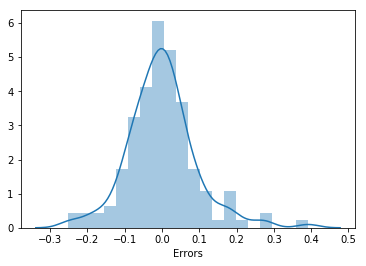

In [60]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
plt.xlabel('Errors')

### PREDICTION


In [61]:
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','carlength','carwidth','price']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [62]:
y_test = df_test.pop('price')
X_test = df_test

In [63]:
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\User\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [64]:
y_pred = lm.predict(X_test_new)

In [65]:
r2_score(y_test, y_pred)

0.7341329439008153

Text(0, 0.5, 'y_pred')

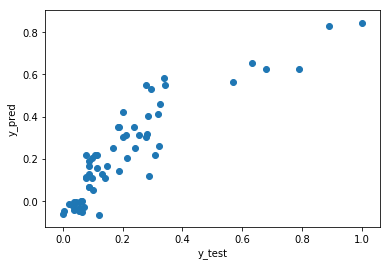

In [66]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
 
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [67]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     72.75
Date:                Mon, 14 Oct 2019   Prob (F-statistic):           5.11e-45
Time:                        00:47:37   Log-Likelihood:                 136.77
No. Observations:                 143   AIC:                            -255.5
Df Residuals:                     134   BIC:                            -228.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0381      0.047     -0.803      0.4